In [2]:
import openmeteo_requests

import requests_cache
import pandas as pd
from retry_requests import retry

In [ ]:
# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://api.open-meteo.com/v1/forecast"
params = {
	"latitude": 47.0613,
	"longitude": 11.6675,
	"past_days": 2,
    "forecast_days": 3,
	"hourly": ["temperature_2m", "relative_humidity_2m", "dew_point_2m", "precipitation", "rain", "snowfall", "snow_depth", "weather_code", "pressure_msl", "surface_pressure", "cloud_cover", "cloud_cover_low", "cloud_cover_mid", "cloud_cover_high", "et0_fao_evapotranspiration", "vapour_pressure_deficit", "wind_speed_10m", "wind_speed_100m", "wind_direction_10m", "wind_direction_100m", "wind_gusts_10m", "soil_temperature_0_to_7cm", "soil_temperature_7_to_28cm", "soil_temperature_28_to_100cm", "soil_temperature_100_to_255cm", "soil_moisture_0_to_7cm", "soil_moisture_7_to_28cm", "soil_moisture_28_to_100cm", "soil_moisture_100_to_255cm", "sunshine_duration"],
	"models": "best_match"
}

responses = openmeteo.weather_api(url, params=params)


# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")


Coordinates 47.2400016784668°N 11.84000015258789°E
Elevation 1818.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s


In [2]:
# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
hourly_relative_humidity_2m = hourly.Variables(1).ValuesAsNumpy()
hourly_dew_point_2m = hourly.Variables(2).ValuesAsNumpy()
hourly_precipitation = hourly.Variables(3).ValuesAsNumpy()
hourly_rain = hourly.Variables(4).ValuesAsNumpy()
hourly_snowfall = hourly.Variables(5).ValuesAsNumpy()
hourly_snow_depth = hourly.Variables(6).ValuesAsNumpy()
hourly_weather_code = hourly.Variables(7).ValuesAsNumpy()
hourly_pressure_msl = hourly.Variables(8).ValuesAsNumpy()
hourly_surface_pressure = hourly.Variables(9).ValuesAsNumpy()
hourly_cloud_cover = hourly.Variables(10).ValuesAsNumpy()
hourly_cloud_cover_low = hourly.Variables(11).ValuesAsNumpy()
hourly_cloud_cover_mid = hourly.Variables(12).ValuesAsNumpy()
hourly_cloud_cover_high = hourly.Variables(13).ValuesAsNumpy()
hourly_et0_fao_evapotranspiration = hourly.Variables(14).ValuesAsNumpy()
hourly_vapour_pressure_deficit = hourly.Variables(15).ValuesAsNumpy()
hourly_wind_speed_10m = hourly.Variables(16).ValuesAsNumpy()
hourly_wind_speed_100m = hourly.Variables(17).ValuesAsNumpy()
hourly_wind_direction_10m = hourly.Variables(18).ValuesAsNumpy()
hourly_wind_direction_100m = hourly.Variables(19).ValuesAsNumpy()
hourly_wind_gusts_10m = hourly.Variables(20).ValuesAsNumpy()
hourly_soil_temperature_0_to_7cm = hourly.Variables(21).ValuesAsNumpy()
hourly_soil_temperature_7_to_28cm = hourly.Variables(22).ValuesAsNumpy()
hourly_soil_temperature_28_to_100cm = hourly.Variables(23).ValuesAsNumpy()
hourly_soil_temperature_100_to_255cm = hourly.Variables(24).ValuesAsNumpy()
hourly_soil_moisture_0_to_7cm = hourly.Variables(25).ValuesAsNumpy()
hourly_soil_moisture_7_to_28cm = hourly.Variables(26).ValuesAsNumpy()
hourly_soil_moisture_28_to_100cm = hourly.Variables(27).ValuesAsNumpy()
hourly_soil_moisture_100_to_255cm = hourly.Variables(28).ValuesAsNumpy()
hourly_sunshine_duration = hourly.Variables(29).ValuesAsNumpy()


hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}
hourly_data["temperature_2m"] = hourly_temperature_2m
hourly_data["relative_humidity_2m"] = hourly_relative_humidity_2m
hourly_data["dew_point_2m"] = hourly_dew_point_2m
hourly_data["precipitation"] = hourly_precipitation
hourly_data["rain"] = hourly_rain
hourly_data["snowfall"] = hourly_snowfall
hourly_data["snow_depth"] = hourly_snow_depth
hourly_data["weather_code"] = hourly_weather_code
hourly_data["pressure_msl"] = hourly_pressure_msl
hourly_data["surface_pressure"] = hourly_surface_pressure
hourly_data["cloud_cover"] = hourly_cloud_cover
hourly_data["cloud_cover_low"] = hourly_cloud_cover_low
hourly_data["cloud_cover_mid"] = hourly_cloud_cover_mid
hourly_data["cloud_cover_high"] = hourly_cloud_cover_high
hourly_data["et0_fao_evapotranspiration"] = hourly_et0_fao_evapotranspiration
hourly_data["vapour_pressure_deficit"] = hourly_vapour_pressure_deficit
hourly_data["wind_speed_10m"] = hourly_wind_speed_10m
hourly_data["wind_speed_100m"] = hourly_wind_speed_100m
hourly_data["wind_direction_10m"] = hourly_wind_direction_10m
hourly_data["wind_direction_100m"] = hourly_wind_direction_100m
hourly_data["wind_gusts_10m"] = hourly_wind_gusts_10m
hourly_data["soil_temperature_0_to_7cm"] = hourly_soil_temperature_0_to_7cm
hourly_data["soil_temperature_7_to_28cm"] = hourly_soil_temperature_7_to_28cm
hourly_data["soil_temperature_28_to_100cm"] = hourly_soil_temperature_28_to_100cm
hourly_data["soil_temperature_100_to_255cm"] = hourly_soil_temperature_100_to_255cm
hourly_data["soil_moisture_0_to_7cm"] = hourly_soil_moisture_0_to_7cm
hourly_data["soil_moisture_7_to_28cm"] = hourly_soil_moisture_7_to_28cm
hourly_data["soil_moisture_28_to_100cm"] = hourly_soil_moisture_28_to_100cm
hourly_data["soil_moisture_100_to_255cm"] = hourly_soil_moisture_100_to_255cm
hourly_data["sunshine_duration"] = hourly_sunshine_duration

hourly_dataframe = pd.DataFrame(data = hourly_data)
hourly_dataframe

,date,temperature_2m,relative_humidity_2m,dew_point_2m,precipitation,rain,snowfall,snow_depth,weather_code,pressure_msl,...,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,sunshine_duration
0,2024-12-10 00:00:00+00:00,-6.7740,100.0,-6.774000,0.0,0.0,0.00,0.24,77.0,1021.099976,...,14.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,2024-12-10 01:00:00+00:00,-6.8740,100.0,-6.874000,0.0,0.0,0.00,0.24,71.0,1021.099976,...,14.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2024-12-10 02:00:00+00:00,-6.8240,100.0,-6.824000,0.0,0.0,0.00,0.24,71.0,1021.500000,...,15.480000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,2024-12-10 03:00:00+00:00,-6.7240,100.0,-6.724000,0.0,0.0,0.00,0.24,77.0,1021.299988,...,16.919998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,2024-12-10 04:00:00+00:00,-6.9240,100.0,-6.924001,0.0,0.0,0.00,0.24,45.0,1020.599976,...,17.639999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2024-12-14 19:00:00+00:00,-4.6865,96.0,-5.226689,0.2,0.0,0.14,0.20,71.0,1024.699951,...,34.560001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
116,2024-12-14 20:00:00+00:00,-4.7865,96.0,-5.326236,0.1,0.0,0.07,0.20,71.0,1025.000000,...,32.039997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
117,2024-12-14 21:00:00+00:00,-4.9365,97.0,-5.338946,0.1,0.0,0.07,0.20,71.0,1025.000000,...,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
118,2024-12-14 22:00:00+00:00,-4.9365,94.0,-5.752615,0.1,0.0,0.07,0.21,71.0,1025.099976,...,32.399998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [3]:
import openmeteo_requests

import requests_cache
import pandas as pd
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url2 = "https://historical-forecast-api.open-meteo.com/v1/forecast"
params2 = {
	"latitude": 47.26580883196723,
	"longitude": 11.84457426992035,
	"start_date": "2024-12-10",
	"end_date": "2024-12-11",
	"hourly": ["temperature_2m", "relative_humidity_2m", "dew_point_2m", "precipitation", "rain", "snowfall", "snow_depth", "weather_code", "pressure_msl", "surface_pressure", "cloud_cover", "cloud_cover_low", "cloud_cover_mid", "cloud_cover_high", "et0_fao_evapotranspiration", "vapour_pressure_deficit", "wind_speed_10m", "wind_speed_100m", "wind_direction_10m", "wind_direction_100m", "wind_gusts_10m", "soil_temperature_0_to_7cm", "soil_temperature_7_to_28cm", "soil_temperature_28_to_100cm", "soil_temperature_100_to_255cm", "soil_moisture_0_to_7cm", "soil_moisture_7_to_28cm", "soil_moisture_28_to_100cm", "soil_moisture_100_to_255cm", "sunshine_duration"],
	"models": "best_match"
}

responses2 = openmeteo.weather_api(url, params=params2)


# Process first location. Add a for-loop for multiple locations or weather models
response2 = responses2[0]
print(f"Coordinates {response2.Latitude()}°N {response2.Longitude()}°E")
print(f"Elevation {response2.Elevation()} m asl")
print(f"Timezone {response2.Timezone()} {response2.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response2.UtcOffsetSeconds()} s")


Coordinates 47.2400016784668°N 11.84000015258789°E
Elevation 1818.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s


In [6]:
# Process hourly data. The order of variables needs to be the same as requested.
hourly = response2.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
hourly_relative_humidity_2m = hourly.Variables(1).ValuesAsNumpy()
hourly_dew_point_2m = hourly.Variables(2).ValuesAsNumpy()
hourly_precipitation = hourly.Variables(3).ValuesAsNumpy()
hourly_rain = hourly.Variables(4).ValuesAsNumpy()
hourly_snowfall = hourly.Variables(5).ValuesAsNumpy()
hourly_snow_depth = hourly.Variables(6).ValuesAsNumpy()
hourly_weather_code = hourly.Variables(7).ValuesAsNumpy()
hourly_pressure_msl = hourly.Variables(8).ValuesAsNumpy()
hourly_surface_pressure = hourly.Variables(9).ValuesAsNumpy()
hourly_cloud_cover = hourly.Variables(10).ValuesAsNumpy()
hourly_cloud_cover_low = hourly.Variables(11).ValuesAsNumpy()
hourly_cloud_cover_mid = hourly.Variables(12).ValuesAsNumpy()
hourly_cloud_cover_high = hourly.Variables(13).ValuesAsNumpy()
hourly_et0_fao_evapotranspiration = hourly.Variables(14).ValuesAsNumpy()
hourly_vapour_pressure_deficit = hourly.Variables(15).ValuesAsNumpy()
hourly_wind_speed_10m = hourly.Variables(16).ValuesAsNumpy()
hourly_wind_speed_100m = hourly.Variables(17).ValuesAsNumpy()
hourly_wind_direction_10m = hourly.Variables(18).ValuesAsNumpy()
hourly_wind_direction_100m = hourly.Variables(19).ValuesAsNumpy()
hourly_wind_gusts_10m = hourly.Variables(20).ValuesAsNumpy()
hourly_soil_temperature_0_to_7cm = hourly.Variables(21).ValuesAsNumpy()
hourly_soil_temperature_7_to_28cm = hourly.Variables(22).ValuesAsNumpy()
hourly_soil_temperature_28_to_100cm = hourly.Variables(23).ValuesAsNumpy()
hourly_soil_temperature_100_to_255cm = hourly.Variables(24).ValuesAsNumpy()
hourly_soil_moisture_0_to_7cm = hourly.Variables(25).ValuesAsNumpy()
hourly_soil_moisture_7_to_28cm = hourly.Variables(26).ValuesAsNumpy()
hourly_soil_moisture_28_to_100cm = hourly.Variables(27).ValuesAsNumpy()
hourly_soil_moisture_100_to_255cm = hourly.Variables(28).ValuesAsNumpy()
hourly_sunshine_duration = hourly.Variables(29).ValuesAsNumpy()


hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}
hourly_data["temperature_2m"] = hourly_temperature_2m
hourly_data["relative_humidity_2m"] = hourly_relative_humidity_2m
hourly_data["dew_point_2m"] = hourly_dew_point_2m
hourly_data["precipitation"] = hourly_precipitation
hourly_data["rain"] = hourly_rain
hourly_data["snowfall"] = hourly_snowfall
hourly_data["snow_depth"] = hourly_snow_depth
hourly_data["weather_code"] = hourly_weather_code
hourly_data["pressure_msl"] = hourly_pressure_msl
hourly_data["surface_pressure"] = hourly_surface_pressure
hourly_data["cloud_cover"] = hourly_cloud_cover
hourly_data["cloud_cover_low"] = hourly_cloud_cover_low
hourly_data["cloud_cover_mid"] = hourly_cloud_cover_mid
hourly_data["cloud_cover_high"] = hourly_cloud_cover_high
hourly_data["et0_fao_evapotranspiration"] = hourly_et0_fao_evapotranspiration
hourly_data["vapour_pressure_deficit"] = hourly_vapour_pressure_deficit
hourly_data["wind_speed_10m"] = hourly_wind_speed_10m
hourly_data["wind_speed_100m"] = hourly_wind_speed_100m
hourly_data["wind_direction_10m"] = hourly_wind_direction_10m
hourly_data["wind_direction_100m"] = hourly_wind_direction_100m
hourly_data["wind_gusts_10m"] = hourly_wind_gusts_10m
hourly_data["soil_temperature_0_to_7cm"] = hourly_soil_temperature_0_to_7cm
hourly_data["soil_temperature_7_to_28cm"] = hourly_soil_temperature_7_to_28cm
hourly_data["soil_temperature_28_to_100cm"] = hourly_soil_temperature_28_to_100cm
hourly_data["soil_temperature_100_to_255cm"] = hourly_soil_temperature_100_to_255cm
hourly_data["soil_moisture_0_to_7cm"] = hourly_soil_moisture_0_to_7cm
hourly_data["soil_moisture_7_to_28cm"] = hourly_soil_moisture_7_to_28cm
hourly_data["soil_moisture_28_to_100cm"] = hourly_soil_moisture_28_to_100cm
hourly_data["soil_moisture_100_to_255cm"] = hourly_soil_moisture_100_to_255cm
hourly_data["sunshine_duration"] = hourly_sunshine_duration

hourly_dataframe_forecast = pd.DataFrame(data = hourly_data)
hourly_dataframe_forecast.head(2)

,date,temperature_2m,relative_humidity_2m,dew_point_2m,precipitation,rain,snowfall,snow_depth,weather_code,pressure_msl,...,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,sunshine_duration
0,2024-12-10 00:00:00+00:00,-6.774,100.0,-6.774,0.0,0.0,0.0,0.24,77.0,1021.099976,...,14.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,2024-12-10 01:00:00+00:00,-6.874,100.0,-6.874,0.0,0.0,0.0,0.24,71.0,1021.099976,...,14.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [7]:
api_forecast_past_days = hourly_dataframe.head(10)
api_forecast_archive = hourly_dataframe_forecast.head(10)

In [8]:
# Check whether first rows are equal

are_equal = api_forecast_past_days.equals(api_forecast_archive)
are_equal

True

In [3]:
# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": 47.0613,
	"longitude": 11.6675,
	"start_date": "2024-01-01",
	"end_date": "2024-12-12",
	"hourly": ["temperature_2m", "relative_humidity_2m", "dew_point_2m", "precipitation", "rain", "snowfall", "snow_depth", "weather_code", "pressure_msl", "surface_pressure", "cloud_cover", "cloud_cover_low", "cloud_cover_mid", "cloud_cover_high", "et0_fao_evapotranspiration", "vapour_pressure_deficit", "wind_speed_10m", "wind_speed_100m", "wind_direction_10m", "wind_direction_100m", "wind_gusts_10m", "soil_temperature_0_to_7cm", "soil_temperature_7_to_28cm", "soil_temperature_28_to_100cm", "soil_temperature_100_to_255cm", "soil_moisture_0_to_7cm", "soil_moisture_7_to_28cm", "soil_moisture_28_to_100cm", "soil_moisture_100_to_255cm", "sunshine_duration"],
	"models": "best_match"
}
responses3 = openmeteo.weather_api(url, params=params)


# Process first location. Add a for-loop for multiple locations or weather models
response3 = responses3[0]
print(f"Coordinates {response3.Latitude()}°N {response3.Longitude()}°E")
print(f"Elevation {response3.Elevation()} m asl")
print(f"Timezone {response3.Timezone()} {response3.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response3.UtcOffsetSeconds()} s")

Coordinates 47.065025329589844°N 11.707316398620605°E
Elevation 2979.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s


In [4]:
# Process hourly data. The order of variables needs to be the same as requested.
hourly = response3.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
hourly_relative_humidity_2m = hourly.Variables(1).ValuesAsNumpy()
hourly_dew_point_2m = hourly.Variables(2).ValuesAsNumpy()
hourly_precipitation = hourly.Variables(3).ValuesAsNumpy()
hourly_rain = hourly.Variables(4).ValuesAsNumpy()
hourly_snowfall = hourly.Variables(5).ValuesAsNumpy()
hourly_snow_depth = hourly.Variables(6).ValuesAsNumpy()
hourly_weather_code = hourly.Variables(7).ValuesAsNumpy()
hourly_pressure_msl = hourly.Variables(8).ValuesAsNumpy()
hourly_surface_pressure = hourly.Variables(9).ValuesAsNumpy()
hourly_cloud_cover = hourly.Variables(10).ValuesAsNumpy()
hourly_cloud_cover_low = hourly.Variables(11).ValuesAsNumpy()
hourly_cloud_cover_mid = hourly.Variables(12).ValuesAsNumpy()
hourly_cloud_cover_high = hourly.Variables(13).ValuesAsNumpy()
hourly_et0_fao_evapotranspiration = hourly.Variables(14).ValuesAsNumpy()
hourly_vapour_pressure_deficit = hourly.Variables(15).ValuesAsNumpy()
hourly_wind_speed_10m = hourly.Variables(16).ValuesAsNumpy()
hourly_wind_speed_100m = hourly.Variables(17).ValuesAsNumpy()
hourly_wind_direction_10m = hourly.Variables(18).ValuesAsNumpy()
hourly_wind_direction_100m = hourly.Variables(19).ValuesAsNumpy()
hourly_wind_gusts_10m = hourly.Variables(20).ValuesAsNumpy()
hourly_soil_temperature_0_to_7cm = hourly.Variables(21).ValuesAsNumpy()
hourly_soil_temperature_7_to_28cm = hourly.Variables(22).ValuesAsNumpy()
hourly_soil_temperature_28_to_100cm = hourly.Variables(23).ValuesAsNumpy()
hourly_soil_temperature_100_to_255cm = hourly.Variables(24).ValuesAsNumpy()
hourly_soil_moisture_0_to_7cm = hourly.Variables(25).ValuesAsNumpy()
hourly_soil_moisture_7_to_28cm = hourly.Variables(26).ValuesAsNumpy()
hourly_soil_moisture_28_to_100cm = hourly.Variables(27).ValuesAsNumpy()
hourly_soil_moisture_100_to_255cm = hourly.Variables(28).ValuesAsNumpy()
hourly_sunshine_duration = hourly.Variables(29).ValuesAsNumpy()


hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}
hourly_data["temperature_2m"] = hourly_temperature_2m
hourly_data["relative_humidity_2m"] = hourly_relative_humidity_2m
hourly_data["dew_point_2m"] = hourly_dew_point_2m
hourly_data["precipitation"] = hourly_precipitation
hourly_data["rain"] = hourly_rain
hourly_data["snowfall"] = hourly_snowfall
hourly_data["snow_depth"] = hourly_snow_depth
hourly_data["weather_code"] = hourly_weather_code
hourly_data["pressure_msl"] = hourly_pressure_msl
hourly_data["surface_pressure"] = hourly_surface_pressure
hourly_data["cloud_cover"] = hourly_cloud_cover
hourly_data["cloud_cover_low"] = hourly_cloud_cover_low
hourly_data["cloud_cover_mid"] = hourly_cloud_cover_mid
hourly_data["cloud_cover_high"] = hourly_cloud_cover_high
hourly_data["et0_fao_evapotranspiration"] = hourly_et0_fao_evapotranspiration
hourly_data["vapour_pressure_deficit"] = hourly_vapour_pressure_deficit
hourly_data["wind_speed_10m"] = hourly_wind_speed_10m
hourly_data["wind_speed_100m"] = hourly_wind_speed_100m
hourly_data["wind_direction_10m"] = hourly_wind_direction_10m
hourly_data["wind_direction_100m"] = hourly_wind_direction_100m
hourly_data["wind_gusts_10m"] = hourly_wind_gusts_10m
hourly_data["soil_temperature_0_to_7cm"] = hourly_soil_temperature_0_to_7cm
hourly_data["soil_temperature_7_to_28cm"] = hourly_soil_temperature_7_to_28cm
hourly_data["soil_temperature_28_to_100cm"] = hourly_soil_temperature_28_to_100cm
hourly_data["soil_temperature_100_to_255cm"] = hourly_soil_temperature_100_to_255cm
hourly_data["soil_moisture_0_to_7cm"] = hourly_soil_moisture_0_to_7cm
hourly_data["soil_moisture_7_to_28cm"] = hourly_soil_moisture_7_to_28cm
hourly_data["soil_moisture_28_to_100cm"] = hourly_soil_moisture_28_to_100cm
hourly_data["soil_moisture_100_to_255cm"] = hourly_soil_moisture_100_to_255cm
hourly_data["sunshine_duration"] = hourly_sunshine_duration

Last48hours_weather = pd.DataFrame(data = hourly_data)
Last48hours_weather.head(2)

,date,temperature_2m,relative_humidity_2m,dew_point_2m,precipitation,rain,snowfall,snow_depth,weather_code,pressure_msl,...,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,sunshine_duration
0,2024-01-01 00:00:00+00:00,-11.890499,93.766724,-12.690500,0.7,0.0,0.49,1.37,73.0,1014.599976,...,39.239998,-3.3905,-3.1905,-2.6405,-1.4905,0.212,0.214,0.208,0.268,0.0
1,2024-01-01 01:00:00+00:00,-12.390499,94.121216,-13.140499,0.4,0.0,0.28,1.38,73.0,1014.500000,...,30.599998,-3.3905,-3.1905,-2.6405,-1.4905,0.213,0.214,0.208,0.268,0.0


In [5]:
Last48hours_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8328 entries, 0 to 8327
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   date                           8328 non-null   datetime64[ns, UTC]
 1   temperature_2m                 8281 non-null   float32            
 2   relative_humidity_2m           8281 non-null   float32            
 3   dew_point_2m                   8281 non-null   float32            
 4   precipitation                  8281 non-null   float32            
 5   rain                           8281 non-null   float32            
 6   snowfall                       8281 non-null   float32            
 7   snow_depth                     7608 non-null   float32            
 8   weather_code                   8281 non-null   float32            
 9   pressure_msl                   8281 non-null   float32            
 10  surface_pressure        

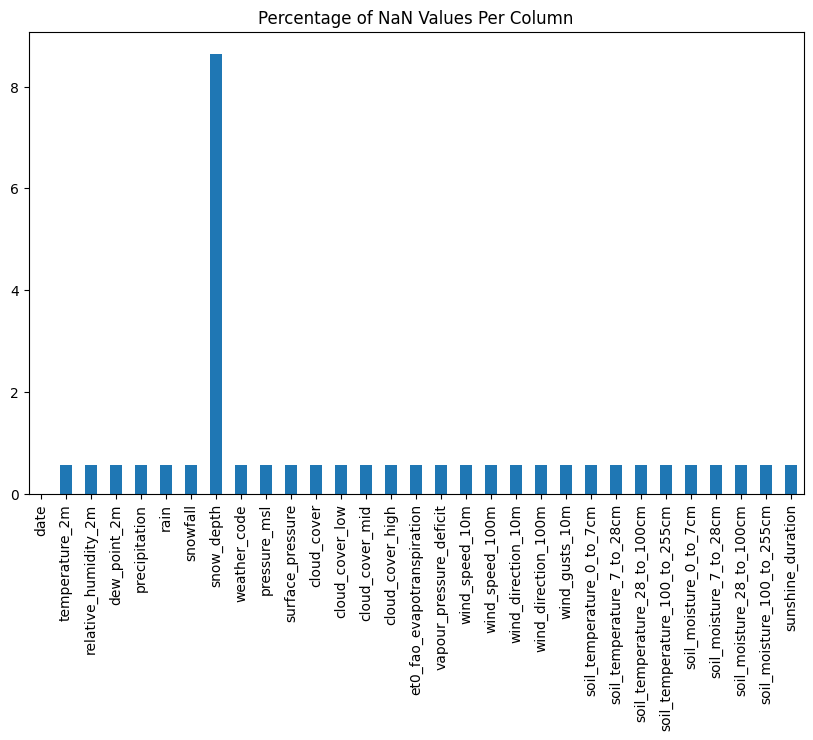

In [8]:
import matplotlib.pyplot as plt#Visualising number of null values in each column
nan_distribution = (Last48hours_weather.isna().sum() / len(Last48hours_weather)) * 100
nan_distribution.plot(kind='bar', figsize=(10, 6), title='Percentage of NaN Values Per Column')
plt.show();

In [15]:
Last48hours_weather.tail(50)

,date,temperature_2m,relative_humidity_2m,dew_point_2m,precipitation,rain,snowfall,snow_depth,weather_code,pressure_msl,...,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,sunshine_duration
131518,2024-12-10 22:00:00+00:00,-12.671000,84.276871,-14.771000,0.0,0.0,0.0,NaN,1.0,1024.199951,...,10.799999,-0.421,-0.021,1.279,4.629,0.191,0.187,0.158,0.267,0.0
131519,2024-12-10 23:00:00+00:00,-13.120999,82.157791,-15.521000,0.0,0.0,0.0,NaN,1.0,1023.599976,...,11.159999,-0.421,-0.021,1.279,4.629,0.191,0.187,0.158,0.267,0.0
131520,2024-12-11 00:00:00+00:00,-13.071000,78.176384,-16.071001,0.0,0.0,0.0,NaN,3.0,1023.299988,...,10.799999,-0.421,-0.021,1.279,4.629,0.191,0.187,0.158,0.267,0.0
131521,2024-12-11 01:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131522,2024-12-11 02:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131523,2024-12-11 03:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131524,2024-12-11 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131525,2024-12-11 05:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131526,2024-12-11 06:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131527,2024-12-11 07:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
